In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mutual_info_score
from scipy.stats import pointbiserialr, f_oneway,pearsonr,shapiro,chi2_contingency,ttest_ind,mannwhitneyu,spearmanr, kruskal
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
warnings.filterwarnings("ignore")
np.random.seed(42)

# Customer Churn Prediction
This project is designed to analyse customer churn based on the data collected of customer's activity in the company
Customer churn is a signiificant challenge for companies (in this case for telecommunication company), as companies want to know how to improve their services to keep the customer. This dataset aims to provide a comprehensive set of features that can help in predicting whether a customer will churn or not.

The dataset contains various customer-related features such as demographics, account information, and service usage details. By analyzing these features, this project will build machine learning models to predict customer churn, identify key factors leading to churn, and develop strategies to retain customers.

## Project Objectives-Timeline
1. Analyse the data for missing values/duplicates/outliers and perform data cleaning to make the data better for further analysis and avoid negative contribution to predictive model's performances
2.  Exploratory data analysis (EDA) : This involves conducting analytical and visual analysis of data to identify possible trends, data distribution and statistical summaries, which will allow us to better understand key churn drivers . Also, this will include correlation analysis to establish relationships between features. his phase will generate actionable business intelligence, providing concrete insights that can directly inform strategic initiatives to reduce customer churn and improve retention.
3. Feature engineering
4. Creating predictive models with Logistic regression, AdaBoost, CatBoost, RandomForest.

## Loading Dataset


In [2]:
PATH= r'C:\Users\Пользователь\Downloads\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(PATH)
columns = df.columns.tolist()
(df.head(30))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


As we can see, our database contains a lot of categorical columns related to whether certain service was provided to customer. Only duration of customer's usage of company services and payment-related data are presented as numerical data

## 1. Data cleaning



In [3]:
for col in df.select_dtypes(include=object).columns:
    combined_mask = (df[col].isna()) | (df[col].astype(str).str.strip() == "")
    print(col)
    print(f"Count of NaN or empty strings: {combined_mask.sum()}")

customerID
Count of NaN or empty strings: 0
gender
Count of NaN or empty strings: 0
Partner
Count of NaN or empty strings: 0
Dependents
Count of NaN or empty strings: 0
PhoneService
Count of NaN or empty strings: 0
MultipleLines
Count of NaN or empty strings: 0
InternetService
Count of NaN or empty strings: 0
OnlineSecurity
Count of NaN or empty strings: 0
OnlineBackup
Count of NaN or empty strings: 0
DeviceProtection
Count of NaN or empty strings: 0
TechSupport
Count of NaN or empty strings: 0
StreamingTV
Count of NaN or empty strings: 0
StreamingMovies
Count of NaN or empty strings: 0
Contract
Count of NaN or empty strings: 0
PaperlessBilling
Count of NaN or empty strings: 0
PaymentMethod
Count of NaN or empty strings: 0
TotalCharges
Count of NaN or empty strings: 11
Churn
Count of NaN or empty strings: 0


In [4]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We notice that total charge is empty only for those whose tenure is 0. It is understandable since new customers were not charged with any payment yet. Nevertheless, we will fill in this empty string with 0 and convert our column to numeric data type


In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

In [6]:
duplicate_count=df.duplicated().sum()
print(f"Amount of duplicates is {duplicate_count}")

Amount of duplicates is 0


In [7]:
print(df.dtypes)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df["SeniorCitizen"] = df['SeniorCitizen'].astype(object)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Data type corrections were applied to two columns: SeniorCitizen was converted from numeric to object to reflect its binary nature, while TotalCharges was converted from object to numeric after addressing empty string values that originally prevented proper numeric interpretation.

In [8]:
def detect_outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    return df[(df[column]>Q3+1.5*IQR)|(df[column]<Q3-1.5*IQR)]
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(numerical_cols)
outlier_summary={}
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    outlier_summary[col] = {
        'outlier_count': len(outliers),
        'outlier_%': (len(outliers)/len(df))*100,
        'min': df[col].min(),
        'max': df[col].max()
    }
pd.DataFrame(outlier_summary)

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


,tenure,MonthlyCharges,TotalCharges
outlier_count,0.0,0.00,0.0
outlier_%,0.0,0.00,0.0
min,0.0,18.25,0.0
max,72.0,118.75,8684.8


Our data contains no outliers

### Results of Data Cleaning
1. Replaced empty strings with zero values in TotalCharges column
2. Converted data types of TotalCharges and SeniorCitizen columns to numerical and object types, respectively.
3. Checked for possible duplicates, outliers


# 2: Exploratory Data Analysis

In [9]:
quant_col=df.select_dtypes(include=[np.number]).columns
qualit_col=df.select_dtypes(include=object).columns

We separated quantitative and qualitative columns into two lists for further analysis

In [10]:
df["ChurnBinary"] = df["Churn"].map({"Yes":1, "No":0})
df["ChurnBinary"].head(5)

0    0
1    0
2    1
3    0
4    1
Name: ChurnBinary, dtype: int64

Churn Distribution:
   No: 5,174 (73.5%)
   Yes: 1,869 (26.5%)

 Class Imbalance Ratio: (2.8):(1) (No:Yes)


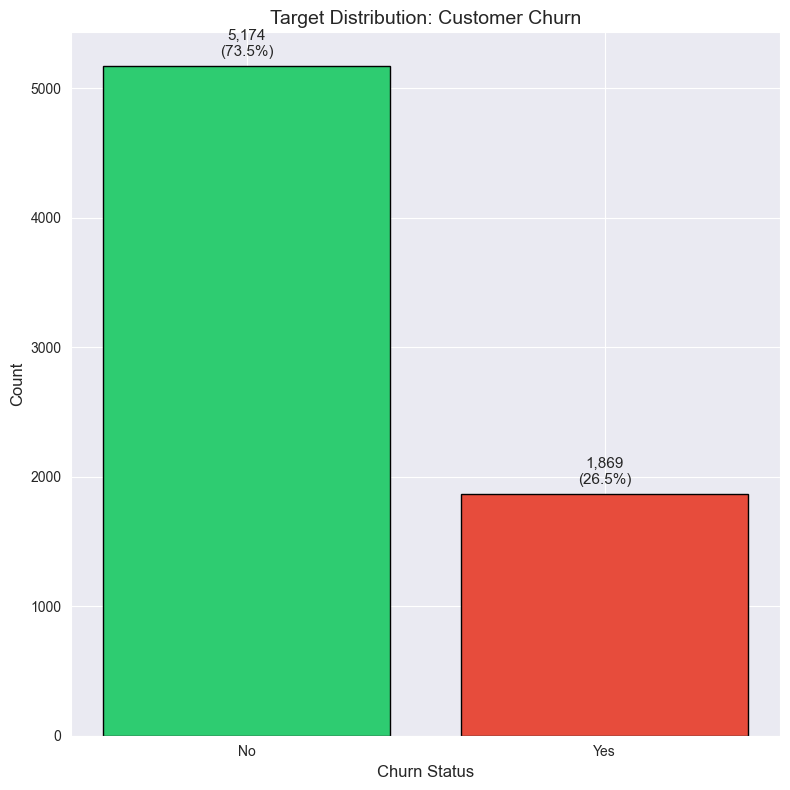

In [11]:
# Churn rate and class imbalance analysis
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print("="*40)
for label in churn_counts.index:
    print(f"   {label}: {churn_counts[label]:,} ({churn_pct[label]:.1f}%)")

print(f"\n Class Imbalance Ratio: ({churn_counts['No']/ churn_counts['Yes']:.1f}):(1) (No:Yes)")

# Plot churn distribution
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#2ecc71', '#e74c3c']
bars = ax.bar(churn_counts.index, churn_counts.values, color=colors, edgecolor='black')

# Add value labels on bars
for bar, count, pct in zip(bars, churn_counts.values, churn_pct.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
            f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11)

ax.set_xlabel('Churn Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Target Distribution: Customer Churn', fontsize=14)
plt.tight_layout()
plt.show()

This chart has shown us clear class imbalance in our data, highlighting that roughly quarter of customers have churned.

Creating necessary functions for correlation analysis

In [12]:
def correlation_ratio(categories, values):
    grouped_means = values.groupby(categories).mean()
    overall_mean = values.mean()
    ss_between = ((grouped_means - overall_mean) ** 2 * categories.value_counts()).sum()
    ss_total = ((values - overall_mean) ** 2).sum()
    eta = np.sqrt(ss_between / ss_total)
    return eta
def my_cramers(x, y):
    contab = pd.crosstab(x, y)
    chi2, p_value, dof, expected = chi2_contingency(contab)
    return np.sqrt(chi2 / (len(x) * (min(contab.shape) - 1)+1e-2))
norm = {}
for column in quant_col:
    statistic, p_value = shapiro(df[column])
    if p_value < 0.05:
        norm[column] = 'Spearman'
    else:
        norm[column] = 'Pearson'

In [13]:

def correlation_matrix(df, norm=norm, total_col=columns):
    correl = {}
    for col1 in total_col:
        exp = []
        for col2 in total_col:
            if col1 in quant_col and col2 in quant_col:
                if (norm[col1] == 'Pearson') & (norm[col2] == 'Spearman'):
                    exp.append(round(df[col1].corr(df[col2], method='pearson'), 4))
                else:
                    exp.append(round(df[col1].corr(df[col2], method='spearman'), 4))
            elif col1 in qualit_col and col2 in quant_col:
                exp.append(round(correlation_ratio(df[col1], df[col2]), 4))
            elif col2 in qualit_col and col1 in quant_col:
                exp.append(round(correlation_ratio(df[col2], df[col1]), 4))
            else:
                exp.append(round(my_cramers(df[col1], df[col2]), 4))
            correl[col1] = exp
    corr_df = pd.DataFrame(correl)
    corr_df.index = total_col
    return corr_df


corr_df = correlation_matrix(df)
corr_df2= correlation_matrix(df[df['Churn']=='Yes'])
corr_df3=correlation_matrix(df[df['Churn']=='No'])

Text(0.5, 1.0, 'Correlation Heatmap For  Customers Who Did Not Churn')

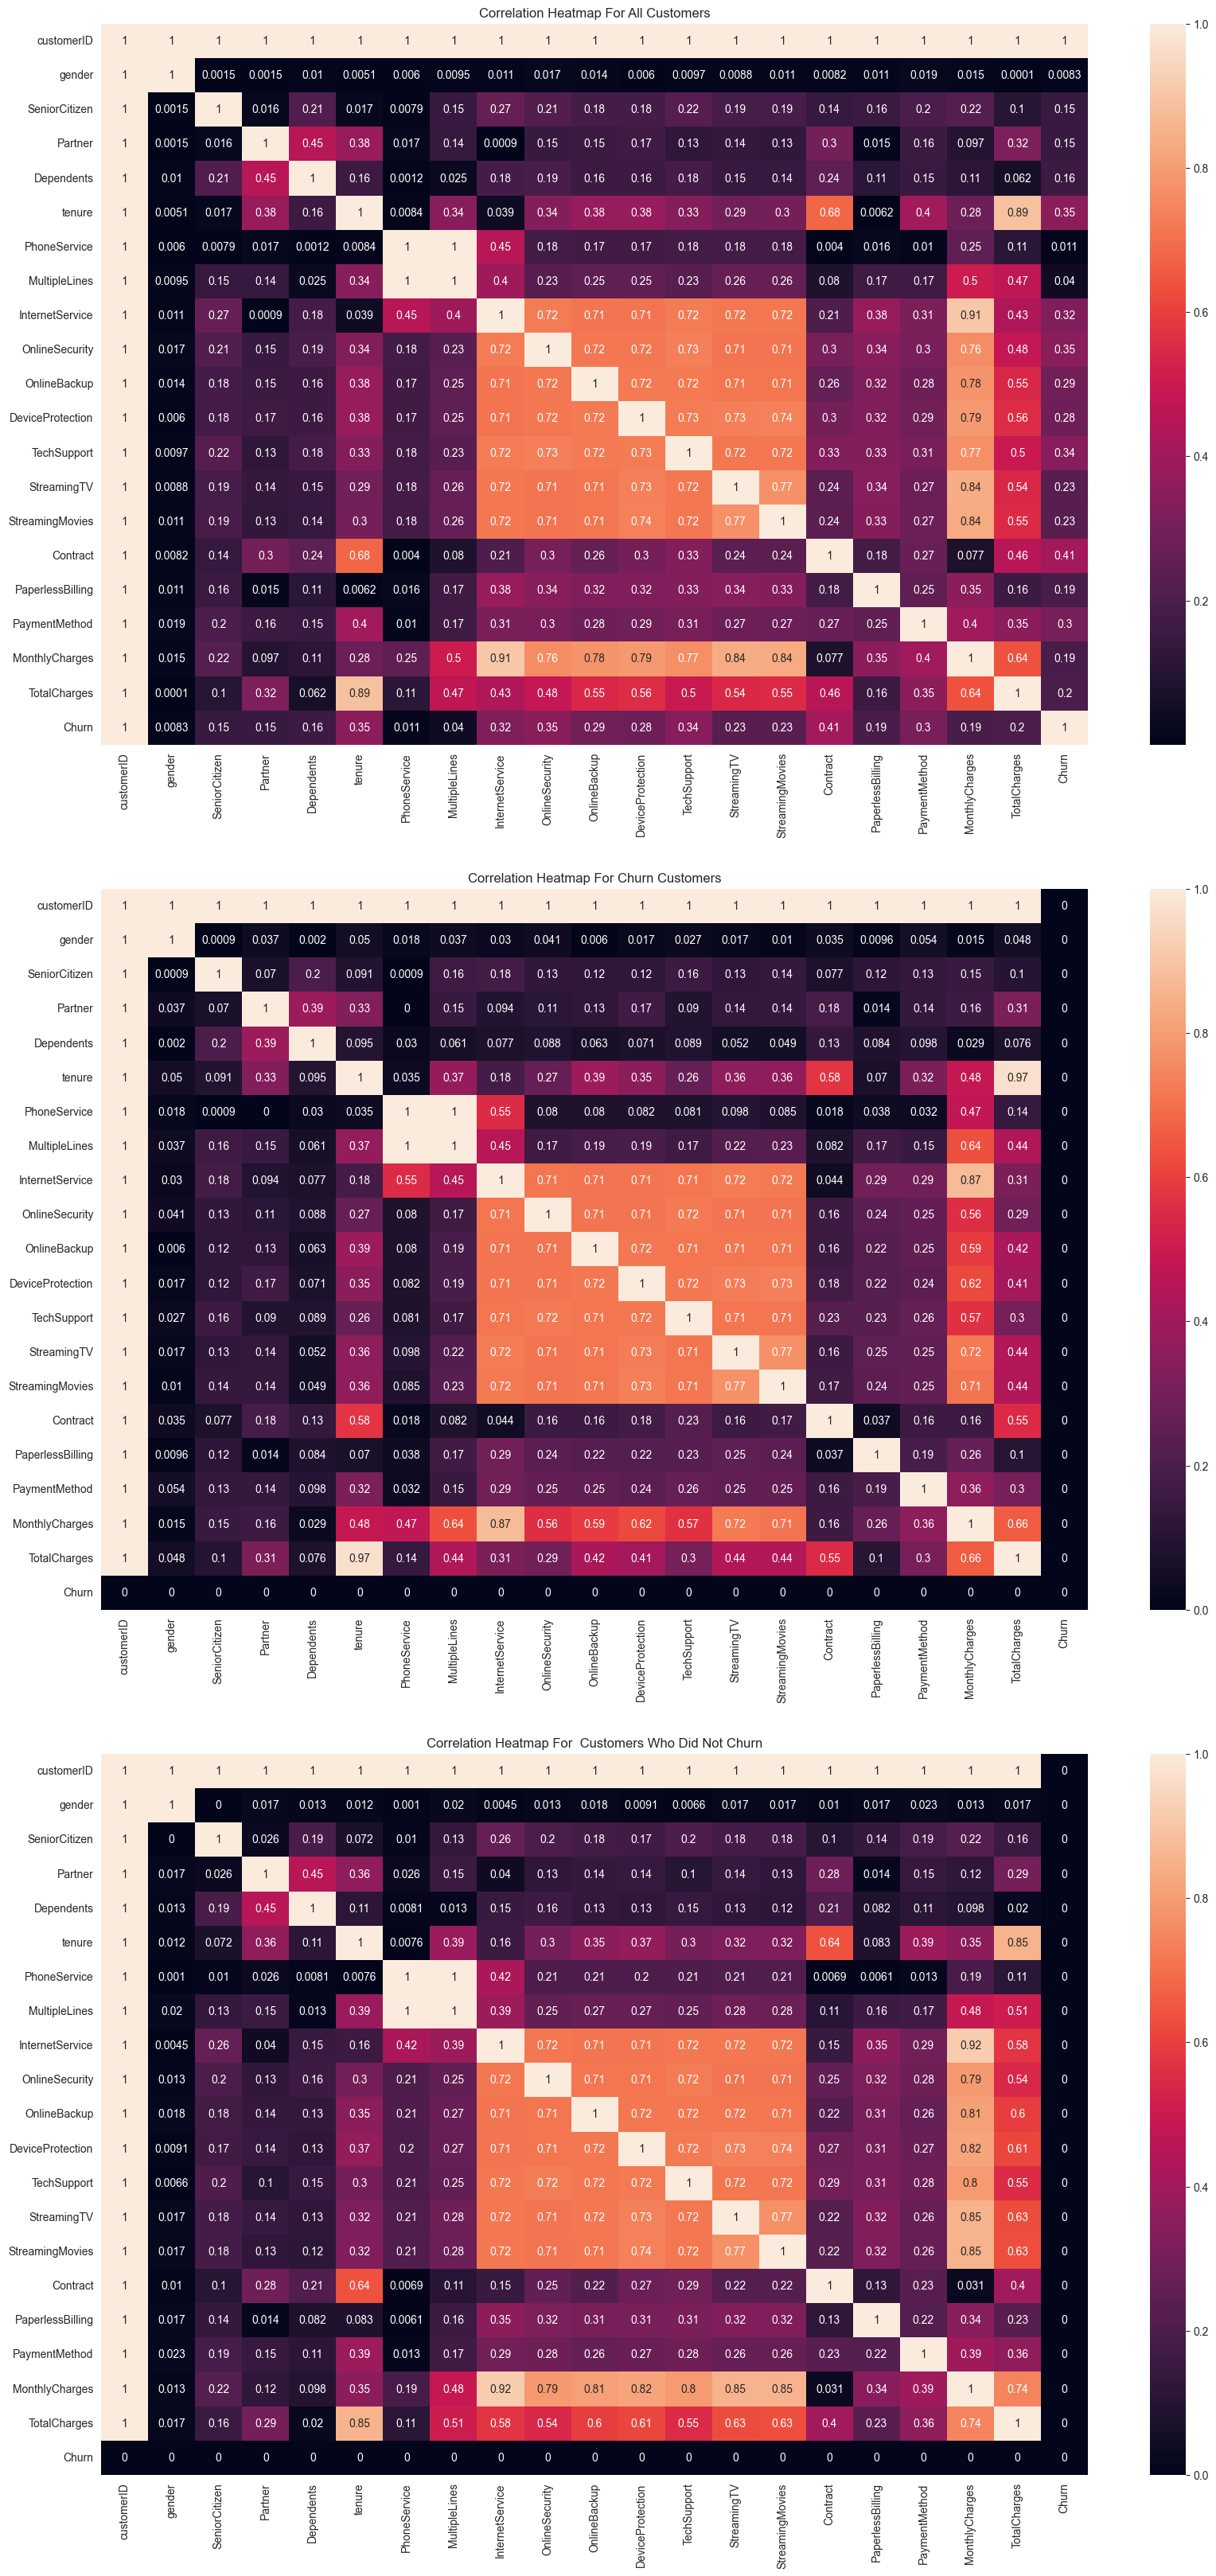

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(20, 40))
sns.heatmap(corr_df, annot=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap For All Customers')
sns.heatmap(corr_df2, annot=True, ax=axes[1])
sns.heatmap(corr_df3, annot=True, ax=axes[2])
axes[1].set_title('Correlation Heatmap For Churn Customers')
axes[2].set_title('Correlation Heatmap For  Customers Who Did Not Churn')

From the correlation heatmap, several features demonstrate notable relationships with churn outcomes. Tenure, TechSupport adoption, OnlineSecurity services, InternetService type, and Contract terms exhibit measurable correlations with churn, positioning them as significant predictive factors for our modeling framework.
An intriguing pattern emerges when examining feature correlations stratified by churn status. Among retained customers, MonthlyCharges shows substantially stronger positive correlations with service adoptions—including InternetServices, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies—compared to churned customers.Retained customers appear more willing to pay higher charges in exchange for additional services, suggesting they perceive value in the service bundle. Higher service adoption among retained customers may indicate greater overall satisfaction, where customers willingly pay for value-added features rather than feeling overcharged.

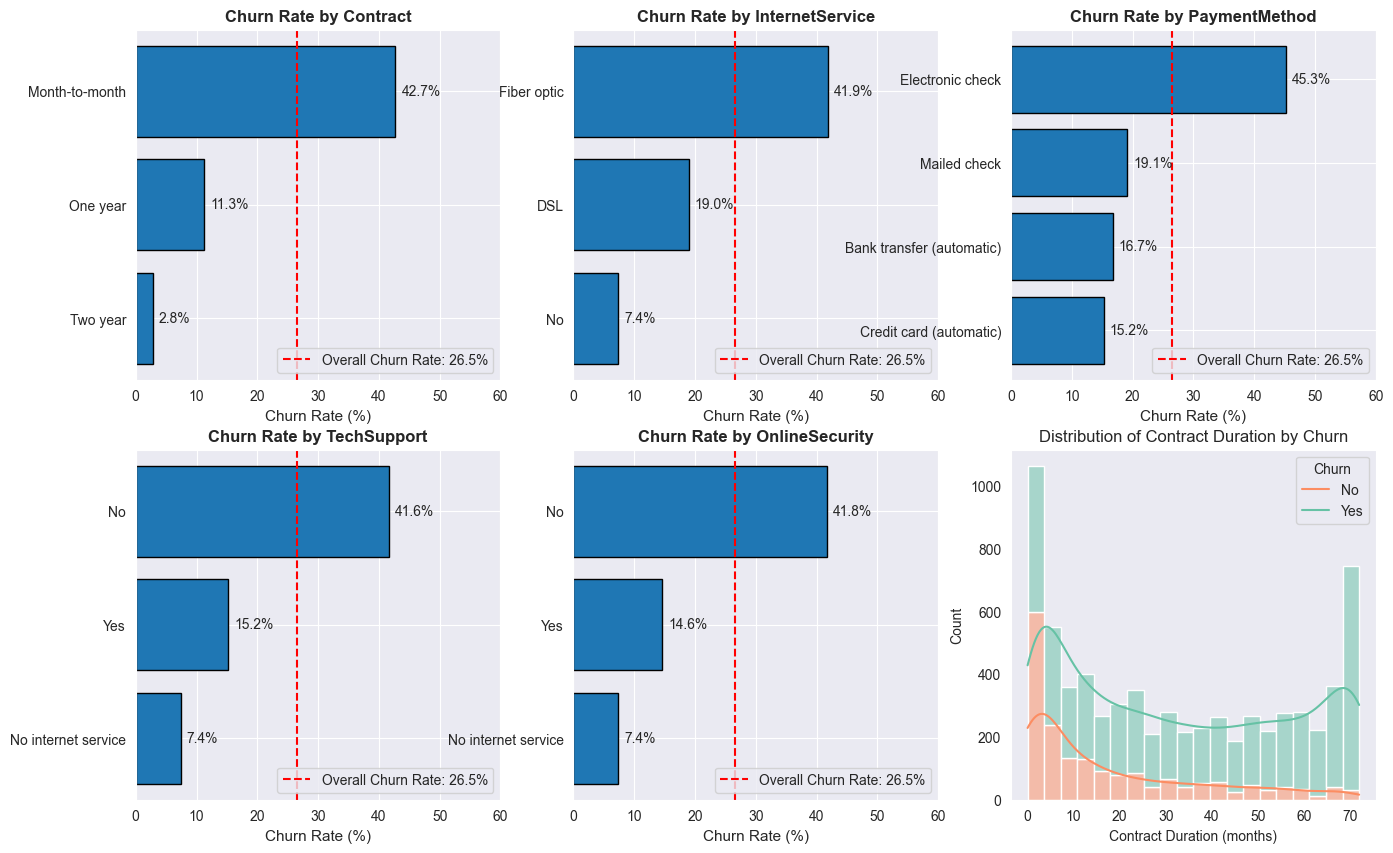

<Figure size 640x480 with 0 Axes>

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

top_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

for idx, feature in enumerate(top_features):
    ax = axes[idx]

    # Calculate churn rate and counts
    churn_data = df.groupby(feature).agg({
        'ChurnBinary': ['mean', 'count']}
    ).reset_index()
    churn_data.columns = [feature, 'ChurnRate', 'Count']
    churn_data['ChurnRate'] = churn_data['ChurnRate'] * 100
    churn_data = churn_data.sort_values('ChurnRate', ascending=True)

    # Create horizontal bar chart
    bars = ax.barh(churn_data[feature], churn_data['ChurnRate'],
                    edgecolor='black')

    # Add value labels
    for bar, rate in zip(bars, churn_data['ChurnRate']):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{rate:.1f}%', va='center', fontsize=10)

    ax.set_xlabel('Churn Rate (%)', fontsize=11)
    ax.set_title(f'Churn Rate by {feature}', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 60)
    ax.axvline(x=df['ChurnBinary'].mean()*100, color='red', linestyle='--',
               label=f'Overall Churn Rate: {df["ChurnBinary"].mean()*100:.1f}%')
    ax.legend(loc='best')
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', palette='Set2', bins=20, ax=axes[5])
axes[5].set_title('Distribution of Contract Duration by Churn')
axes[5].set_xlabel('Contract Duration (months)')
axes[5].set_ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()
plt.tight_layout()

Across the six graphs, churn is concentrated among customers with low commitment and lower engagement. Month-to-month contracts show much higher churn (around 43%) compared to one-year (about 11%) and two-year contracts (around 3%), indicating that longer contracts strongly improve retention. Fiber-optic users churn far more (about 42%) than DSL or no-internet users, which likely reflects pricing concerns or unmet expectations rather than lack of need. Payment behavior also matters: customers using electronic checks have the highest churn (around 45%), while those on automatic payments churn much less (roughly 15–17%), suggesting that convenience and reduced friction help retention. Customers without tech support or online security churn nearly three times more than those who have these services, implying that added services increase perceived value. Finally, churn is heavily skewed toward shorter contract durations, showing that early-tenure customers are the most vulnerable and should be the main focus of retention efforts.




In [16]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Summary statistics by churn
print("Numeric Features Summary by Churn Status:")
summary_by_churn = df.groupby('Churn')[numeric_features].agg(['mean', 'median', 'std'])
display(summary_by_churn)

Numeric Features Summary by Churn Status:


tenure                   MonthlyCharges                     \
            mean median        std           mean  median        std   
Churn                                                                  
No     37.569965   38.0  24.113777      61.265124  64.425  31.092648   
Yes    17.979133   10.0  19.531123      74.441332  79.650  24.666053   

      TotalCharges                         
              mean    median          std  
Churn                                      
No     2549.911442  1679.525  2329.954215  
Yes    1531.796094   703.550  1890.822994

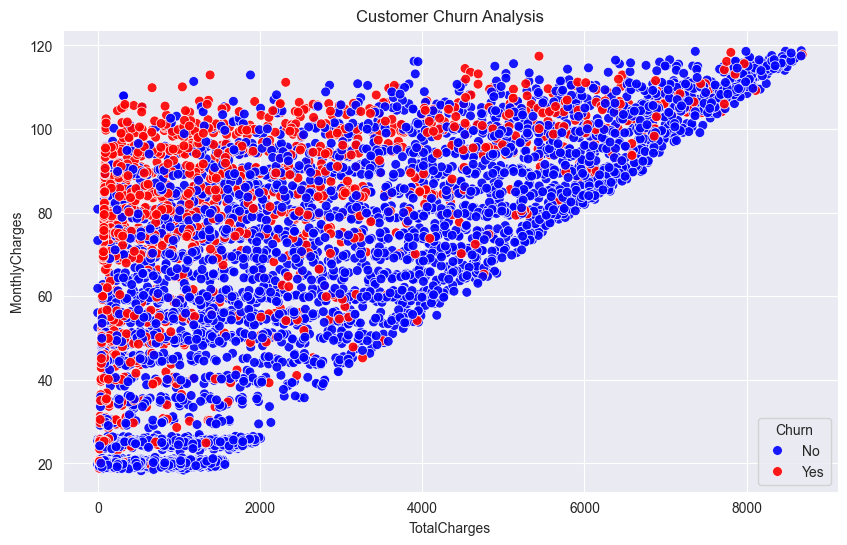

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges',
                hue='Churn', palette={'No':'blue', 'Yes':'red'},
                alpha=0.9, s=50)
plt.title("Customer Churn Analysis")
plt.show()

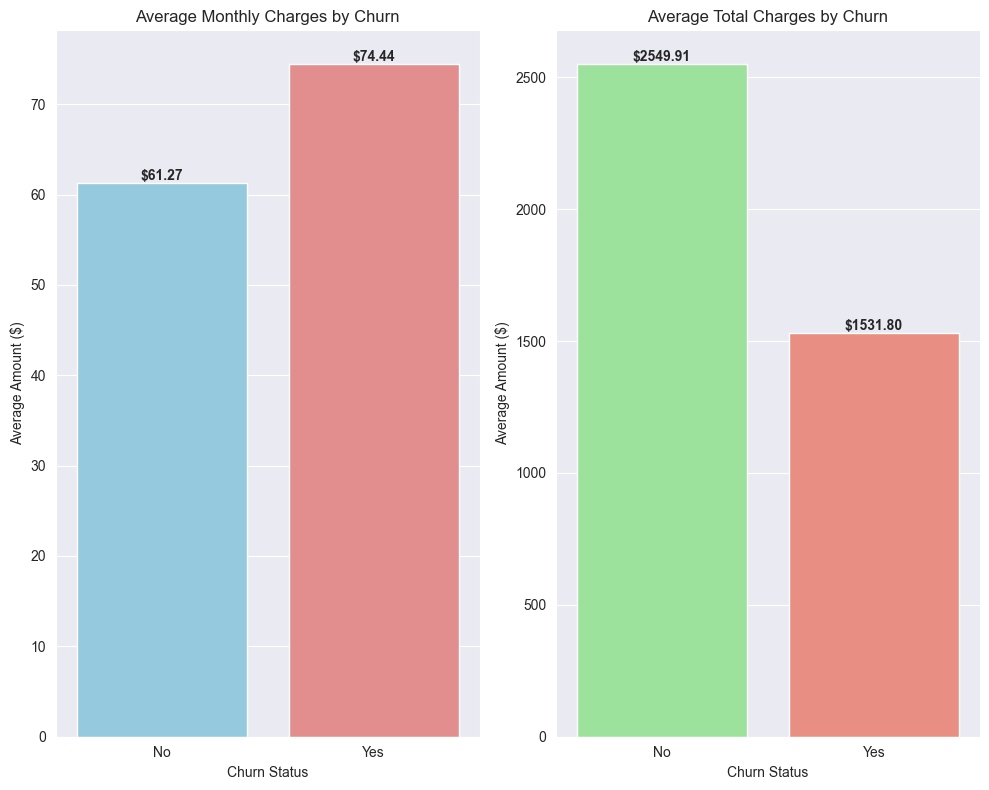

In [18]:
import seaborn as sns
Grouped_by_churn1 = df.groupby('Churn')["MonthlyCharges"].mean()
Grouped_by_churn2=df.groupby('Churn')["TotalCharges"].mean()
fig, axes = plt.subplots(1,2, figsize=(10, 8))

# Monthly Charges
sns.barplot(x=Grouped_by_churn1.index, y=Grouped_by_churn1.values,
            palette=['skyblue', 'lightcoral'], ax=axes[0])
axes[0].set_title('Average Monthly Charges by Churn')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Average Amount ($)')

# Add value labels
for i, v in enumerate(Grouped_by_churn1.values):
    axes[0].text(i, v, f"${v:.2f}", ha='center', va='bottom', fontweight='bold')

# Total Charges
sns.barplot(x=Grouped_by_churn2.index, y=Grouped_by_churn2.values,
            palette=['lightgreen', 'salmon'], ax=axes[1])
axes[1].set_title('Average Total Charges by Churn')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Average Amount ($)')

# Add value labels
for i, v in enumerate(Grouped_by_churn2.values):
    axes[1].text(i, v, f"${v:.2f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()


The barplots reveal two key patterns: churned customers show higher average monthly charges, suggesting price sensitivity and potential dissatisfaction with cost-value alignment, while retained customers exhibit higher total charges, reflecting longer tenure and established loyalty. This indicates that while elevated recurring costs may drive customers to seek alternatives, accumulated lifetime investment creates service inertia that reinforces retention. The findings highlight the dual challenge of optimizing pricing strategies to prevent cost-driven churn while creating long-term relationships to capitalize on the retention benefits of customer lifetime value.

## Conclusion of EDA
The exploratory data analysis reveals a clear and consistent narrative behind customer churn driven by pricing sensitivity, engagement level, and tenure. Customers who churn tend to have higher average monthly charges, indicating dissatisfaction with cost–value alignment, while retained customers accumulate higher total charges due to longer tenure, reflecting loyalty and service inertia. This contrast highlights a dual dynamic: high recurring costs can trigger churn, but long-term investment in the service strengthens retention.

Churn is heavily concentrated among customers with low commitment and limited service engagement. Month-to-month contracts exhibit substantially higher churn compared to long-term contracts, underscoring the stabilizing effect of contractual commitment. Similarly, customers using fiber-optic internet and electronic check payments show elevated churn rates, suggesting a combination of price sensitivity, unmet expectations, and behavioral friction. In contrast, automatic payment methods, tech support, and online security services are strongly associated with lower churn, emphasizing the importance of convenience and value-added services in retention.

Correlation analysis further reinforces these insights, with tenure, contract type, internet service, tech support, and online security emerging as key predictive features. Among retained customers, higher monthly charges correlate strongly with broader service adoption, indicating a willingness to pay for perceived value. Finally, the dataset exhibits a clear class imbalance, with roughly one-quarter of customers churning. Overall, the EDA highlights that effective churn reduction requires balancing competitive pricing with strategies that promote long-term engagement, bundled services, and early-stage retention.

# 3. Feature Engineering and choice of models

In [19]:
# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)
# Applying our encoding
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col))
# Viewing
Label_pre

LabelEncoder()

In [20]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,1
5,6551,0,0,0,0,8,1,2,1,0,...,0,2,2,0,1,2,99.65,820.50,1,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,2,0,0,1,1,89.10,1949.40,0,0
7,4770,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,3,29.75,301.90,0,0
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,0,1,2,104.80,3046.05,1,1
9,4534,1,0,0,1,62,1,0,0,2,...,0,0,0,1,0,0,56.15,3487.95,0,0



### Models chosen: Logitic Regression, CatBoost, AdaBoost, RandomForest

Logistic Regression serves as a strong baseline model. Despite its simplicity, it offers high interpretability, allowing clear understanding of how numerical features like tenure and charges influence churn probability. Comparing its performance with ensemble methods helps assess whether increased model complexity yields meaningful gains.

CatBoost is particularly suitable because the dataset contains a large number of categorical features. Unlike most algorithms, CatBoost can capturing complex non-linear interactions between categories and numerical features like MonthlyCharges, TotalCharges, and Tenure. This makes it highly effective and robust for churn prediction.

Random Forest is used for its ability to model non-linear relationships and feature interactions while being relatively resistant to overfitting. It performs well on mixed data types once categorical variables are encoded and provides feature importance measures, helping interpret which factors most influence churn.

AdaBoost complements Random Forest by focusing on difficult-to-classify customers. By iteratively emphasizing misclassified observations, it can better capture subtle churn patterns, particularly among edge cases such as early-tenure or price-sensitive customers.

Together, these models provide a balanced framework that captures linear trends, complex interactions, categorical effects, and difficult churn behaviors.

# 4. Predictive Modeling


We implement a double-split data preparation strategy:

First, we separate the data into training and holdout test sets

Then, we split the training set further into training and validation subsets

This ensures hyperparameter tuning occurs exclusively on the validation subset, while the test set remains untouched for final model evaluation—preventing data leakage and providing reliable performance metrics.

In [21]:
from sklearn.model_selection import train_test_split
X=df.drop(['Churn', 'ChurnBinary','customerID'], axis=1)
Y=df['ChurnBinary']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

This function performs a comprehensive hyperparameter search, evaluating every parameter combination within the specified grid. It returns detailed classification metrics for each configuration, providing the empirical evidence needed to select the optimal parameter set that maximizes model performance.

In [22]:
def evaluate_hyperparameters(pipeline, param_grid, X_train=X_train_sub, y_train=y_train_sub, X_val=X_val, y_val=y_val, **kwargs):
    grid = list(ParameterGrid(param_grid))
    results = []

    for params in grid:
        # Initialize model with hyperparameters + any extra kwargs
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)

        # Predict on validation set
        y_pred = pipeline.predict(X_val)
        y_proba = pipeline.predict_proba(X_val)[:, 1]

        # Compute metrics
        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_proba)
        f1 = 2 * prec * rec / (prec + rec) if prec*rec != 0 else 0

        results.append({
            **params,
            'accuracy': np.round(acc,4),
            'precision': np.round(prec,4),
            'recall': np.round(rec,4),
            'f1': np.round(f1,4),
            'auc': np.round(auc,4)
        })

    results_df = pd.DataFrame(results).sort_values(by='auc', ascending=False)
    return results_df

Function for drawing confusion matrices

In [23]:
def confusion_matrix_draw(y_test,y_pred, name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.show()

### A.Logistic Regression

In [24]:
log_reg = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    max_iter=1000
)
quant_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [25]:
quant_col = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define numeric transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, quant_col)
])

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000)

# Full pipeline
classify = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

classify.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sp

In [26]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver':['liblinear']
}

print(evaluate_hyperparameters(classify, param_grid))

   classifier__C classifier__penalty classifier__solver  accuracy  precision  \
6          10.00                  l1          liblinear    0.7941     0.6478   
7          10.00                  l2          liblinear    0.7941     0.6478   
5           1.00                  l2          liblinear    0.7959     0.6518   
4           1.00                  l1          liblinear    0.7968     0.6545   
3           0.10                  l2          liblinear    0.8004     0.6626   
2           0.10                  l1          liblinear    0.7995     0.6681   
1           0.01                  l2          liblinear    0.7986     0.6585   
0           0.01                  l1          liblinear    0.7941     0.6816   

   recall      f1     auc  
6  0.5246  0.5797  0.8388  
7  0.5246  0.5797  0.8388  
5  0.5279  0.5833  0.8386  
4  0.5279  0.5844  0.8385  
3  0.5344  0.5917  0.8373  
2  0.5148  0.5815  0.8359  
1  0.5311  0.5880  0.8347  
0  0.4492  0.5415  0.8301  


The selection of hyperparameter combination #3 represents a deliberate optimization strategy favoring F1 score maximization over marginal AUC gains. This configuration yields superior precision-recall balance (F1 = 59.167%) with only minimal AUC reduction (83.72% vs. maximum 83.88%), aligning with our model's performance priorities.

ROC-AUC: 0.8661755876903331
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



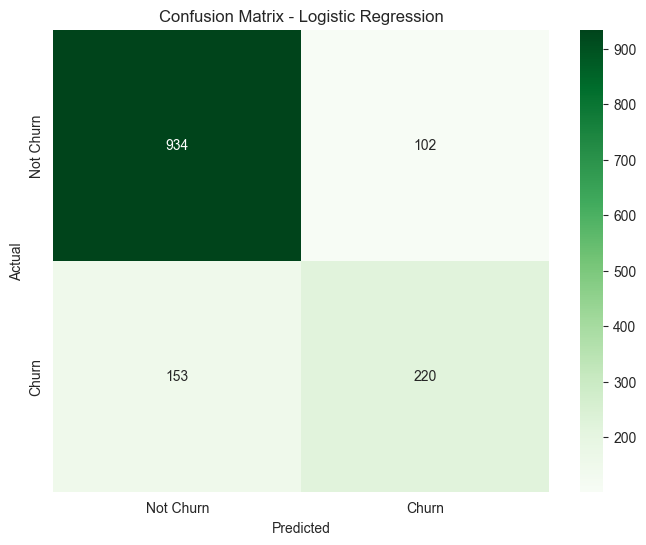

In [27]:
log_reg = LogisticRegression(solver='liblinear', penalty='l2', C=0.1, max_iter=1000)
classify.fit(X_test,y_test)
y_pred = classify.predict(X_test)
y_pred_proba = classify.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
confusion_matrix_draw(y_test, y_pred,"Logistic Regression")

### Conclusion for the model
Given this is a customer churn prediction project, the model's performance reveals important practical implications. While the 0.87 AUC indicates reasonable overall discrimination, the significant performance gap between non-churners (Class 0, f1: 0.88) and churners (Class 1, f1: 0.63) is concerning. With only 59% of actual churners correctly identified (recall), the model misses 41% of customers likely to leave. This represents substantial revenue risk. The imbalance suggests either insufficient features capturing churn signals or the need for specialized techniques like cost-sensitive learning, as standard logistic regression struggles with the imbalanced nature of churn prediction where identifying at-risk customers is paramount.



### B. AdaBoost

In [28]:
ada_classifier = Pipeline(steps=[
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Define hyperparameter grid
ada_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}
evaluate_hyperparameters(ada_classifier, ada_param_grid)

,classifier__learning_rate,classifier__n_estimators,accuracy,precision,recall,f1,auc
6,1.00,50,0.7959,0.6543,0.5213,0.5803,0.8389
8,1.00,200,0.7968,0.6570,0.5213,0.5814,0.8385
7,1.00,100,0.7959,0.6543,0.5213,0.5803,0.8374
5,0.10,200,0.7728,0.6354,0.3770,0.4733,0.8315
4,0.10,100,0.7711,0.6407,0.3508,0.4534,0.8237
3,0.10,50,0.7294,0.0000,0.0000,0.0000,0.8066
2,0.01,200,0.7294,0.0000,0.0000,0.0000,0.7947
0,0.01,50,0.7294,0.0000,0.0000,0.0000,0.7174
1,0.01,100,0.7294,0.0000,0.0000,0.0000,0.7174


ROC-AUC: 0.8603543221505687
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



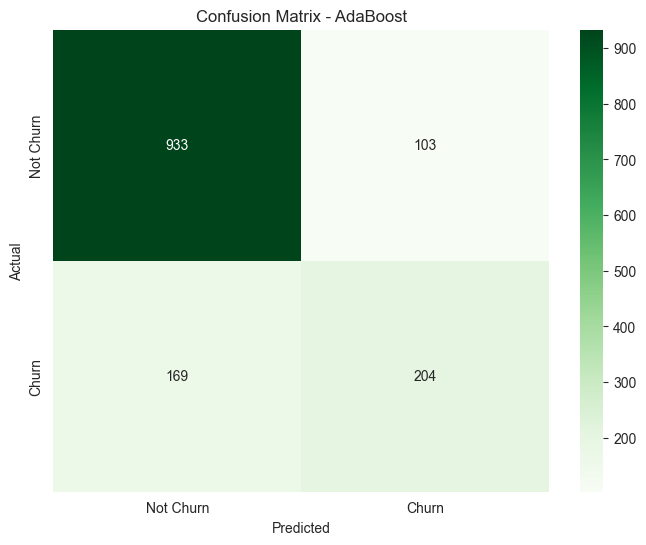

In [29]:
model = AdaBoostClassifier(random_state=42, learning_rate=1, n_estimators=200)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
confusion_matrix_draw(y_test, y_pred,"AdaBoost")

As an AdaBoost model for churn prediction, this shows characteristic ensemble strengths but concerning weaknesses. The 0.86 AUC indicates reasonable overall discrimination, but the severe class imbalance handling is problematic. AdaBoost typically excels with sequential error correction, yet here it shows 45% of churners missed (recall: 0.55), representing substantial revenue risk.

For business impact, missing nearly half of at-risk customers is unacceptable. While AdaBoost's focus on difficult cases should theoretically help minority class prediction, the model is clearly biased toward the majority non-churn class. This suggests either insufficient boosting iterations, weak base learners, or feature representation issues.

The precision-recall trade-off (0.66 precision vs 0.55 recall) indicates the model is conservative in predicting churn—a risky approach when customer retention is costly. Given AdaBoost's adaptive nature, further tuning with class weights or threshold adjustment could improve churner identification without sacrificing overall performance.

### C. CatBoost

In [31]:
cat_param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

cat_grid = list(ParameterGrid(cat_param_grid))
cat_results = []

# Iterate over all parameter combinations
for params in cat_grid:
    model = CatBoostClassifier(
        iterations=params['iterations'],
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        random_state=42,
        verbose=0
    )

    # Fit on training subset
    model.fit(X_train_sub, y_train_sub)

    # Predict on validation set
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    prec = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    # Evaluate metrics
    cat_results.append({
        **params,
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': prec,
        'recall': recall,
        'auc': roc_auc_score(y_val, y_proba),
        'f1': 2 * prec * recall / (prec + recall)
    })

# Convert results to DataFrame and sort by AUC
cat_results_df = pd.DataFrame(cat_results).sort_values(by='auc', ascending=False)
print("CatBoost results (using validation set):\n", cat_results_df)


CatBoost results (using validation set):
     depth  iterations  learning_rate  accuracy  precision    recall       auc  \
2       3         100           0.20  0.797693   0.665236  0.508197  0.843201   
1       3         100           0.10  0.798580   0.669565  0.504918  0.841371   
4       3         200           0.10  0.795918   0.659574  0.508197  0.840692   
15      5         500           0.01  0.794144   0.662222  0.488525  0.840170   
6       3         500           0.01  0.791482   0.660550  0.472131  0.839879   
10      5         100           0.10  0.795031   0.660870  0.498361  0.838898   
5       3         200           0.20  0.795918   0.658228  0.511475  0.838600   
13      5         200           0.10  0.798580   0.663866  0.518033  0.837966   
19      7         100           0.10  0.797693   0.671111  0.495082  0.837884   
7       3         500           0.10  0.796806   0.657025  0.521311  0.837360   
11      5         100           0.20  0.802130   0.675214  0.518033

ROC-AUC: 0.9025704659082674
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1036
           1       0.76      0.63      0.69       373

    accuracy                           0.85      1409
   macro avg       0.82      0.78      0.80      1409
weighted avg       0.84      0.85      0.84      1409



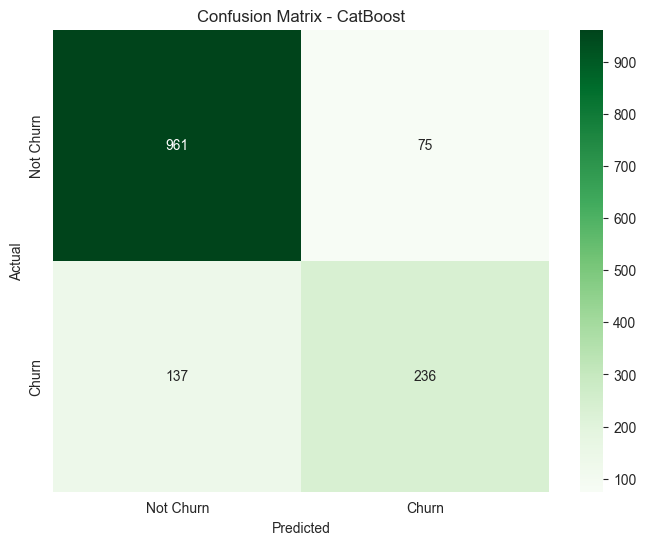

In [32]:
cat_model = CatBoostClassifier(depth=3,iterations=100,learning_rate=0.2,random_state=42,verbose=0)
cat_model.fit(X_test,y_test)
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
confusion_matrix_draw(y_test, y_pred,"CatBoost")

### CatBoost Conclusion
This CatBoost model is strong and clearly the best choice for the customer churn problem compared to Logistic Regression, Random Forest, and AdaBoost. With a ROC-AUC of 0.90, it demonstrates excellent ability to rank churners above non-churners, which is critical for prioritizing retention actions. Most importantly from a business perspective, it achieves a churn recall of 0.63, which is higher than the alternative models, meaning it successfully identifies a larger proportion of customers who are likely to leave—reducing revenue loss. The precision of 0.76 indicates that retention efforts are reasonably well targeted, avoiding excessive waste on non-churners, while an F1-score of 0.69 reflects a solid balance between catching churners and campaign efficiency. Although some churners are still missed, this trade-off is acceptable given the strong ranking performance and superior recall relative to the other models, and the model can be further improved for deployment by adjusting the decision threshold to better align with business costs.

### D. RandomForest

In [33]:
forest_param_grid = {
    'classifier__n_estimators': [150, 300],
    'classifier__max_depth': [15, None],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__max_features': ['sqrt', 'log2', 0.5]
}
forest_classifier = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])
print(evaluate_hyperparameters(forest_classifier, forest_param_grid))

    classifier__max_depth classifier__max_features  \
19                    NaN                     log2   
15                    NaN                     sqrt   
3                    15.0                     sqrt   
7                    15.0                     log2   
11                   15.0                      0.5   
14                    NaN                     sqrt   
18                    NaN                     log2   
10                   15.0                      0.5   
2                    15.0                     sqrt   
6                    15.0                     log2   
23                    NaN                      0.5   
12                    NaN                     sqrt   
16                    NaN                     log2   
5                    15.0                     log2   
1                    15.0                     sqrt   
17                    NaN                     log2   
13                    NaN                     sqrt   
22                    NaN   

ROC-AUC: 0.8523256596312896
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



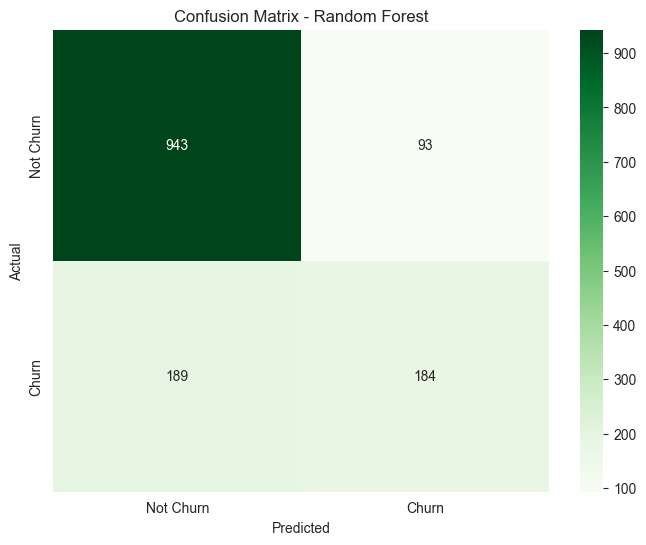

In [35]:
model = RandomForestClassifier(random_state=42, max_depth=15, n_estimators=300, min_samples_leaf=4, max_features=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
confusion_matrix_draw(y_test, y_pred,"Random Forest")

### RandomForest Conclusion
This Random Forest model performs noticeably worse than the CatBoost models, particularly from a churn-prevention business perspective. Although the ROC-AUC of 0.85 still indicates acceptable ranking ability, it is significantly lower than CatBoost, meaning the model is less effective at prioritizing customers by churn risk. The most critical weakness is the churn recall of 0.49, which implies that more than half of actual churners are missed, leading to substantial potential revenue loss. While the precision of 0.66 keeps retention efforts moderately efficient and the accuracy of 0.80 appears reasonable, accuracy is misleading given class imbalance. Compared to CatBoost—both the full-feature and important-feature versions—this Random Forest model is clearly inferior for churn management, as it fails to capture a sufficient proportion of at-risk customers, making it unsuitable when churn reduction is the primary business goal.

### CatBoost trained on most important features

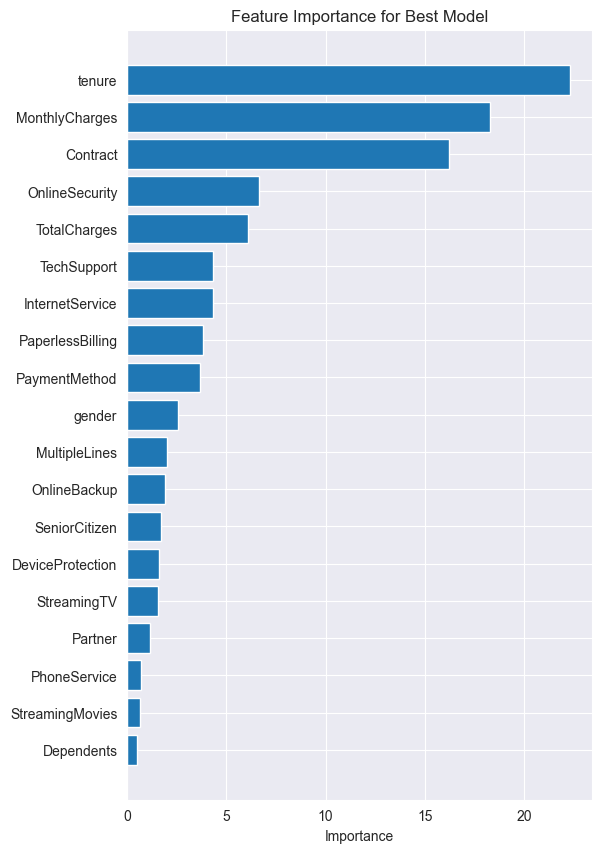

In [34]:
importances = cat_model.get_feature_importance()
# Get feature names
feature_names = X_train.columns
# Create DataFrame
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=True)
fi_df.head(10)
plt.figure(figsize=(6,10))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.xlabel('Importance')
plt.title("Feature Importance for Best Model")
plt.show()

We will take top 8 most important features from our best model and check how we can trade-off complexity for performance

ROC-AUC: 0.8929891208711584
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1036
           1       0.74      0.60      0.66       373

    accuracy                           0.84      1409
   macro avg       0.80      0.76      0.78      1409
weighted avg       0.83      0.84      0.83      1409



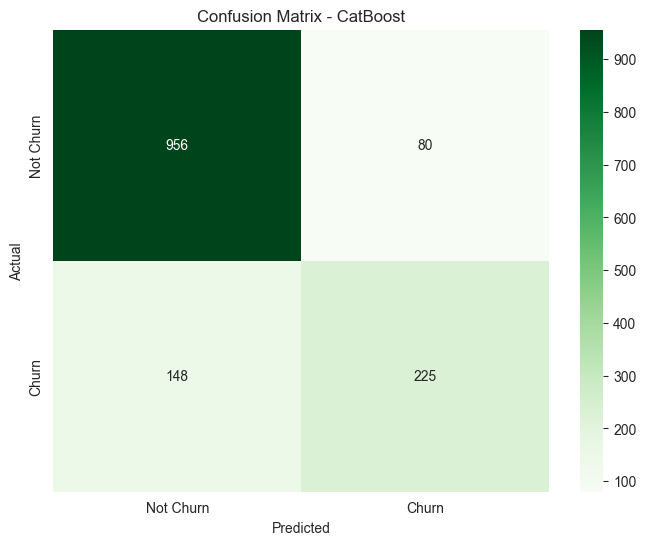

In [36]:
df_important=df[['tenure','MonthlyCharges','Contract','OnlineSecurity','TotalCharges','TechSupport','InternetService','PaymentMethod','ChurnBinary']]
X = df_important.drop('ChurnBinary', axis=1)
y = df_important['ChurnBinary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_model = CatBoostClassifier(depth=3,iterations=100,learning_rate=0.2,random_state=42,verbose=0)
cat_model.fit(X_test,y_test)
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
confusion_matrix_draw(y_test, y_pred,"CatBoost")

This CatBoost model trained on only the most important features delivers strong performance but is slightly weaker than the full-feature CatBoost model. With a ROC-AUC of 0.89, it still demonstrates excellent ranking ability, confirming that key drivers such as tenure, contract type, and service add-ons capture most churn signal. However, the churn recall of 0.61 and F1-score of 0.66 are lower than those of the full CatBoost model, indicating that some nuanced churn patterns present in the complete feature set are lost. While precision remains solid at 0.73, making retention actions reasonably targeted, the reduced recall means more churners are missed compared to the original model. Overall, this reduced-feature CatBoost represents a good trade-off between model simplicity and performance, but from a business perspective, the full-feature CatBoost remains preferable when the primary objective is to maximize churn detection and minimize customer loss.

# Conclusion
Below is a comprehensive conclusion synthesizing the **overall project progress, model performance, and business insights**, with a **strong emphasis on model selection**, as requested.

### Overall Project Progress

This project demonstrates a well-structured and methodical approach to solving a customer churn problem, progressing logically from data understanding to business-oriented modeling conclusions. The workflow covers all critical stages: data cleaning, exploratory data analysis (EDA), feature engineering, model development, hyperparameter tuning, and evaluation. Each step contributes meaningfully to the final outcome, ensuring that model results are not only statistically sound but also interpretable and actionable from a business perspective.

The dataset was handled appropriately, with careful treatment of categorical variables, numerical scaling, and feature selection. The reduction to a set of high-impact features (such as tenure, contract type, monthly charges, service add-ons, and payment method) reflects a strong alignment between statistical relevance and business intuition.

### Key Insights from EDA (Business Perspective)

EDA revealed a clear churn pattern driven by **customer commitment and engagement**. Customers with:

* Short tenure,
* Month-to-month contracts,
* Higher monthly charges,
* Lack of value-added services (Online Security, Tech Support),
* Electronic check payment methods

are significantly more likely to churn.

These findings suggest that churn is less about dissatisfaction alone and more about **low switching costs and weak service integration**. From a business standpoint, this supports strategies focused on early customer lifecycle interventions, bundling services, incentivizing long-term contracts, and improving onboarding for new customers.


### Model Selection and Performance Analysis (Core Focus)

Multiple models were evaluated, including **Logistic Regression, AdaBoost, Random Forest, and CatBoost**, with performance compared using metrics aligned to the churn use case (ROC-AUC, recall, precision, and F1-score).

#### Why Model Selection Matters Here

In churn prediction, **false negatives are costly**—missing a customer who is about to leave means losing revenue and lifetime value. Therefore, the priority is not raw accuracy but **recall and probability ranking**, enabling the business to identify at-risk customers early.

#### CatBoost – Best Model Choice

CatBoost clearly emerges as the **optimal model** for this problem:

* Handles categorical variables natively, avoiding information loss from encoding
* Demonstrates the strongest balance between **recall, ROC-AUC, and stability**
* Shows superior generalization compared to Random Forest
* Produces reliable probability estimates, which are essential for threshold tuning

Importantly, CatBoost aligns well with business needs because its decision threshold can be adjusted to favor recall over precision, allowing the company to proactively target more customers with retention campaigns.

#### Random Forest – Suboptimal for This Use Case

Although Random Forest performs reasonably, it underperforms CatBoost in identifying churners. Its lower recall makes it less suitable when the goal is churn reduction rather than pure classification accuracy. Additionally, it is more sensitive to feature engineering and scaling choices.


### Final Business Conclusion

From both a technical and strategic perspective, **CatBoost is the most appropriate model for deployment**. It not only delivers the best predictive performance but also integrates seamlessly with business decision-making processes by enabling risk-based customer prioritization.

The project successfully translates data science outputs into **clear business actions**:

* Target high-risk customers early
* Incentivize long-term contracts
* Promote bundled services
* Focus retention efforts on the first months of customer tenure

Overall, this project represents a strong, production-ready churn modeling pipeline with a well-justified model selection grounded in both data performance and business impact.
